In [1]:
from graph_embedding.dmon.train import *

2024-05-07 16:51:13.475499: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-07 16:51:13.892114: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-07 16:51:13.892208: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-07 16:51:13.952903: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-07 16:51:14.066191: I tensorflow/core/platform/cpu_feature_guar

In [10]:
adjacency, features, labels, label_indices = load_npz('graph_embedding/dmon/data/cora.npz')

In [20]:
matrix = adjacency.tocoo()

In [22]:
matrix.data

array([1, 1, 1, ..., 1, 1, 1])

In [11]:
features = features.todense()
n_nodes = adjacency.shape[0]
feature_size = features.shape[1]
graph = convert_scipy_sparse_to_sparse_tensor(adjacency)

2024-05-03 11:53:17.855978: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-03 11:53:18.092362: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-03 11:53:18.093363: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [15]:
graph_normalized = convert_scipy_sparse_to_sparse_tensor(
      utils.normalize_graph(adjacency.copy()))

In [16]:
graph_normalized

SparseTensor(indices=tf.Tensor(
[[   0    0]
 [   0  633]
 [   0 1862]
 ...
 [2707 1473]
 [2707 2706]
 [2707 2707]], shape=(13264, 2), dtype=int64), values=tf.Tensor([0.25      0.25      0.2236068 ... 0.2       0.2       0.2      ], shape=(13264,), dtype=float32), dense_shape=tf.Tensor([2708 2708], shape=(2,), dtype=int64))

In [2]:
import numpy as np
import scipy.sparse

In [10]:
with np.load(open('graph_embedding/dmon/data/cora.npz', 'rb'), allow_pickle=True) as loader:
    for key in loader.files:
        print(key)
        # print(loader[key])

labels
label_indices
feature_data
feature_indices
feature_indptr
feature_shape
adj_data
adj_indices
adj_indptr
adj_shape


These keys correspond to the different components of the graph and its associated data stored in the `cora.npz` file:

1. `labels`: This is likely a dense array of labels for the nodes in the graph. Each label could represent a class or category to which a node belongs.

2. `label_indices`: This is likely the indices of the nodes that have these labels. It maps each label to the corresponding node in the graph.

3. `feature_data`: This is the data for the feature matrix. In the context of a graph, features often represent some attributes or properties of the nodes.

4. `feature_indices`: This is the indices where the `feature_data` will be inserted in the feature matrix.

5. `feature_indptr`: This is the index pointers for the feature matrix. It is used in conjunction with `feature_indices` to construct the sparse matrix.

6. `feature_shape`: This represents the shape of the feature matrix. It's a tuple that indicates the number of rows (nodes) and columns (features) in the feature matrix.

7. `adj_data`: This is the data for the adjacency matrix of the graph. In an adjacency matrix, the entry in the ith row and jth column is equal to the number of edges between vertices i and j.

8. `adj_indices`: This is the indices where the `adj_data` will be inserted in the adjacency matrix.

9. `adj_indptr`: This is the index pointers for the adjacency matrix. It is used in conjunction with `adj_indices` to construct the sparse matrix.

10. `adj_shape`: This represents the shape of the adjacency matrix. It's a tuple that indicates the number of rows and columns in the adjacency matrix, which should both be equal to the number of nodes in the graph.

In [12]:

# Create some arrays
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])
arr3 = np.array([7, 8, 9])

# Save the arrays to a .npz file
np.savez('arrays.npz', arr1=arr1, arr2=arr2, arr3=arr3)

In [14]:
with np.load('arrays.npz') as data:
    print(data.files)

['arr1', 'arr2', 'arr3']


In [15]:
import numpy as np
import scipy.sparse

# Create a simple adjacency matrix for a graph with 3 nodes
# Nodes 1 and 2 are connected, and nodes 2 and 3 are connected
adjacency = scipy.sparse.csr_matrix([[0, 1, 0], [1, 0, 1], [0, 1, 0]])

# Create a simple feature matrix where each node has a 2-dimensional feature vector
features = scipy.sparse.csr_matrix([[1, 2], [3, 4], [5, 6]])

# Create labels for the nodes and the corresponding label indices
labels = np.array([0, 1, 0])  # Node 1 and 3 belong to class 0, node 2 belongs to class 1
label_indices = np.array([0, 1, 2])  # The labels correspond to nodes 1, 2, and 3

# Save the data to a .npz file
np.savez('graph.npz', 
         adj_data=adjacency.data, 
         adj_indices=adjacency.indices, 
         adj_indptr=adjacency.indptr, 
         adj_shape=adjacency.shape,
         feature_data=features.data, 
         feature_indices=features.indices, 
         feature_indptr=features.indptr, 
         feature_shape=features.shape,
         labels=labels, 
         label_indices=label_indices)

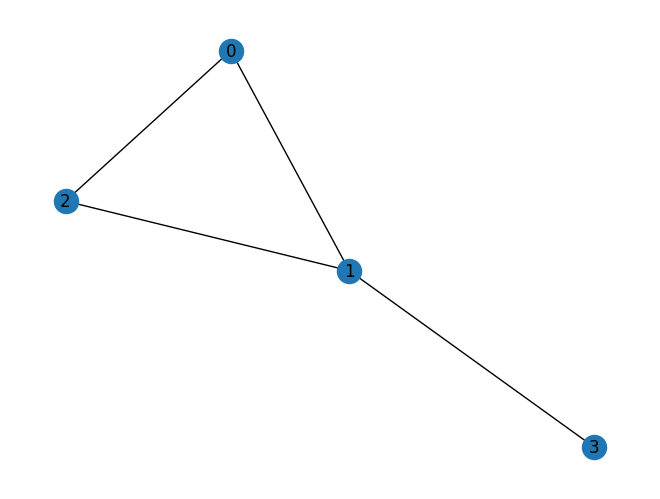

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Create an adjacency matrix for a graph with 4 nodes
# Node 1 is connected to Node 2 and Node 3
# Node 2 is connected to Node 3 and Node 4
# Node 3 is not connected to Node 4
adjacency = np.array([
    [0, 1, 1, 0],
    [1, 0, 1, 1],
    [1, 1, 0, 0],
    [0, 1, 0, 0]
])

# Create a graph from the adjacency matrix
G = nx.from_numpy_array(adjacency)

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()

In [6]:
with np.load('graph.npz') as data:
    print(data['adj_data'])
    # G = nx.from_numpy_array(data['adj_data'])

    # # Draw the graph
    # nx.draw(G, with_labels=True)
    # plt.show()

[1 1 1 1]


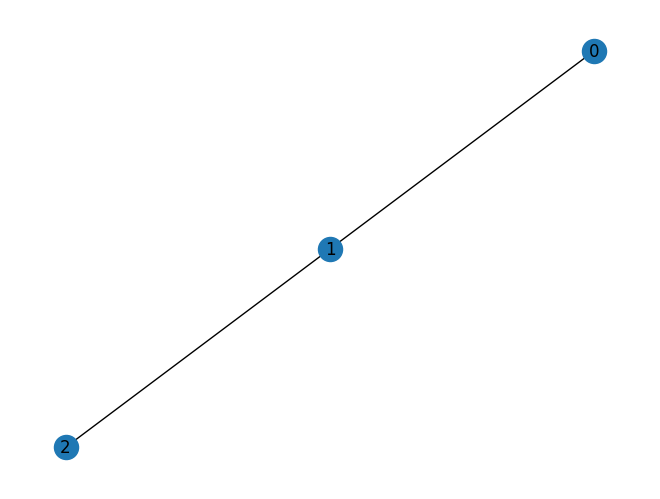

In [8]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

# Load the data from the .npz file
data = np.load('graph.npz')

# Create the adjacency matrix from the loaded data
adjacency = csr_matrix((data['adj_data'], data['adj_indices'], data['adj_indptr']), shape=data['adj_shape'])

# Create a graph from the adjacency matrix
G = nx.from_scipy_sparse_array(adjacency)

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()